### <div align="center">Spring 2024: Compututational and Variational Methods for Inverse Problems</div>
#### <div align="center"> Assignment-02: Optimization methods and automatic differentiation</div>
<div align="center">  <b>Shreshth Saini (SS223464)</b> </div>
<div align="center"><I> <a href="mailto:saini.2@utexas.edu">saini.2@utexas.edu</a> </I></div>



<div align="center">  Due March 18, 2024 </div>
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### <div align="center"> Problem-1: Derivation of the optimization problem </div> 

#### Given: 

$u : [0,1]$ $\rarr$ $\R$ be the height of a chain as a function of horizontal position $x$. In order to find the shape of the chain, we minimize the potential energy of the chain $E(u)$ . Constrain is : chain is fixed at both ends and has a lenght of $L_0$. Final optimization problem when contraints are enforced is given by the quadratic penalty method: 

$$\min_{u} E(u) + \alpha(L(u) - L_0) \tag{1.1}$$
Such that $$u(0) = u(1) = 0$$
Here, $\alpha$ $>0$



#### **(a) Prove the Lenght of the Chain$:**

**To Prove:** 

$$L(u) = \int_{0}^{1}\sqrt(1+(u'(x))^2)dx $$

Where, $u' := \frac{du}{dx}.$

**Proof:** 

We can start by taking infinitesimal length of the chain $ds$  on the caternary at position $x$ and then integrate over the entire length of the chain.
Using the pythagorean theorem, we can write the infinitesimal length of the chain as: 

$$ds = \sqrt{dx^2 + du^2} \tag{1.2}$$

We can integrate the above equation over the entire length of the chain to get the length of the chain $L(u)$ as: 

$$\int_0^{(L(u))} ds = \int_{0}^{1}\sqrt{1+ (\frac{du}{dx})^2} dx \tag{1.3}$$

$$L(u) = \int_{0}^{1}\sqrt{1+(u'(x))^2}dx \tag{1.4}$$

Hence, we have proved the length of the chain $L(u)$.


#### **(b) Show that the potential energy of the chain, E(u), is given by :**

**To Prove:**

$$E(u) = \int_{0}^{1} \rho gu \sqrt{1+(u'(x))^2}dx \tag{1.5}$$

Where, $\rho$ is the linear density(mass per unit lenght) of the chain and $g$ is the acceleration due to gravity.

**Proof:**

The potential energy of the chain is given by the work done by the gravitational force to pull the chain to its current position. The work done by the gravitational force is given by the product of the force and the distance moved. The force is given by the product of the mass and the acceleration due to gravity. The mass of the chain is given by the product of the linear density of the chain and the length of the chain. For distance, we can take the length of the chain. Now, we can again take infinitesimal length of the chain $ds$  on the caternary at position $x$ and then integrate over the entire length of the chain: 

Gravitational force on the infinitesimal length of the chain $ds$ is given by: 

$$dF = mass * g = \rho ds * g \tag{1.6}$$ 

The work done by the gravitational force to pull the chain to its current position is given by:

$$dW = dF * u = u * g * \rho ds  \tag{1.7}$$

Potential energy for infinitesimal length of the chain $ds$ is given by: 

$$dE = dW = u * g * \rho ds \tag{1.8}$$

from equation 1.2, we have $ds = \sqrt{dx^2 + du^2}$. We can integrate the above equation over the entire length of the chain to get the potential energy of the chain $E(u)$ as:

$$E(u) = \int_{0}^{1} u * g * \rho \sqrt{dx^2 + du^2} \tag{1.9}$$

$$E(u) = \int_{0}^{1} \rho gu \sqrt{1+(u'(x))^2}dx \tag{1.10}$$

Hence, we have proved the potential energy of the chain $E(u)$.

In [1]:
# Install the necessary packages 
try:
    import autograd.numpy as np 
    from autograd import grad, jacobian 
    import matplotlib.pyplot as plt
    from scipy.optimize import optimize 
except ImportError:
    !conda install --yes autograd
    !conda install --yes matplotlib
    !conda install --yes scipy
    


#### <div align="center"> Problem-2: Discretized length and energy functionals </div> 

In this problem you will write code to compute the length function $L(u)$ and energy functional $E(u)$ from problem 1, for continuous piecewise linear functions $u:[0,1]\rightarrow \mathbb{R}$ with equally spaced nodes. We assume that $u$ has $N+2$ equally spaced nodes at locations
$$0, h, 2h, 3h, \dots, Nh, 1$$
and that $u$ takes specified values at the nodes, and is piecewise linear in the intervals ("cells") between these nodes.


#### **(a) Spatial derivative of piecewise linear function :**

Let $u(x)$ be a continuous piecewise linear function on $[0,1]$, with $N+2$ equally spaced nodes (including endpoints). The spatial derivative $\frac{du}{dx}$ is piecewise constant on the $N+1$ cells between neighboring nodes. An example of this is shown below.

Text(0.5, 1.0, 'du/dx')

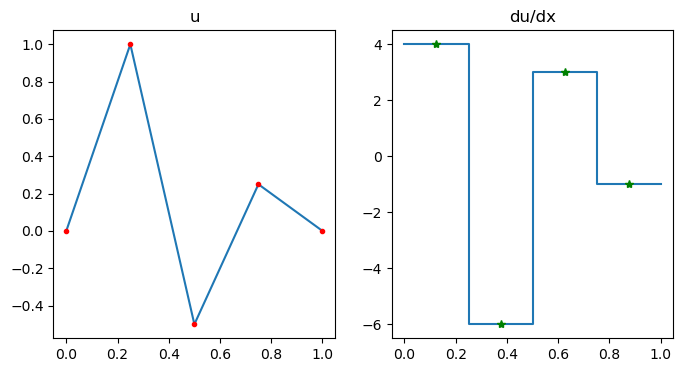

In [4]:
"""
Plot given. 
"""

# Question 2(a)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

nodes = np.linspace(0.0, 1.0, 5)
u_at_nodes = np.array([0.0, 1.0, -0.5, 0.25, 0.0])

cell_centers = 0.5 * (nodes[1:] + nodes[:-1])
du_dx_in_cells = np.array([ 4., -6.,  3., -1.])

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(nodes, u_at_nodes)
plt.plot(nodes, u_at_nodes, '.r')
plt.title('u')

plt.subplot(1,2,2)
plt.plot(nodes, np.concatenate([du_dx_in_cells, [-1]]), drawstyle='steps-post')
plt.plot(cell_centers, du_dx_in_cells, '*g')
plt.title('du/dx')

#### To Do:
Write a function called "spatial\_derivative" that takes the length-$(N+2)$ vector of nodal values for $u$ as input, and returns the length-$N+1$ vector of cell values of $\frac{du}{dx}$ as output.

In [10]:
"""
---> Function to compute the derivative of a function at the nodes of a 1D mesh.

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 2(a) - Solution
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

def spatial_derivative(u_at_nodes):
    """ 
    Compute the derivative of a function at the nodes of a 1D mesh.
    Args:
        u_at_nodes (np.array): The value of the function at the nodes of the mesh.
    Returns:
        np.array: The derivative of the function at the nodes of the mesh.
    
    """
    # compute the cell width; to be used in the finite difference formula
    # width = L/(N+1) = L/((N+2)-1)
    dx = 1/(len(u_at_nodes) - 1) 
    # compute the derivative using a finite difference formula 
    derivates = (u_at_nodes[1:] - u_at_nodes[:-1])/dx
    
    return dx,derivates 


#### Test:
Testing the function defined above;

**Error should be of close to machine epsilon (around $10^{-14}$ or smaller)**

In [11]:
"""
---> Testing the function spatial_derivative
"""

# Question 2(a) - Test 
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

u = np.array([0.25, -0.66,  0.70, -0.41, -1.02, 0.57,  0.13, -1.27,  0.83, -1.21])
du_dx_true = np.array([-8.19,  12.24,  -9.99,  -5.49,  14.31,  -3.96, -12.6,  18.9, -18.36])

_, du_dx = spatial_derivative(u)
spatial_derivative_error = np.linalg.norm(du_dx - du_dx_true)
print('spatial_derivative_error=', spatial_derivative_error)


# if error is above 1e-14, Print the error message 
if spatial_derivative_error > 1e-14:
    print('Error is too high!')


spatial_derivative_error= 5.7044291861996796e-15


#### **(b) Arc length function :**

In Problem 1 we showed that the arc length of a function $u:[0,1]\rightarrow \mathbb{R}$ is given by

$$L(u) = \int_0^1 \sqrt{1 + \left(\frac{du}{dx}(x)\right)^2}~dx$$

#### To Do:
Let $u$ be a continuous piecewise linear function on $[0,1]$, with $N+2$ equally spaced nodes, including endpoints (the same setup as in 2a). Write a function called "length\_functional" that takes the vector of $N+2$ nodal values of $u$ as input, and returns the arc length of $u$ as output.

**Hint:**
The integrand is a piecewise constant function.

In [12]:
"""
---> Function to compute the arc length of u. 

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 2(b) - Solution
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

def length_functional(u_at_nodes):
    """ 
    Compute the arc length of a function.
    Args:
        u_at_nodes (np.array): The value of the function at the nodes of the mesh.
    Returns:
        float: The length of the function.
    
    """
    # compute the derivative of the function at the nodes of the mesh using the function spatial_derivative
    dx, spat_der = spatial_derivative(u_at_nodes)
    # compute the length by summing the square root of 1 + (du/dx)^2 
    L = sum(np.sqrt(1 + spat_der**2)*dx)
    
    return L

#### Test
Testing the function (2-b) defined above;

**Error should be of close to machine epsilon (around $10^{-14}$ or smaller)**


In [15]:
"""
---> Testing the function length_functional
"""

# Question 2(b) - Test 
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

xx = np.linspace(0.0, 1.0, 100)
u = np.sqrt(1.0 / 2.0 - np.power(xx - 0.5, 2))
L_true = 1.1107087105088733

L = length_functional(u)
length_functional_error = np.abs(L - L_true)
print('length_functional_error=', length_functional_error)

# if error is above 1e-14, Print the error message
if length_functional_error > 1e-14:
    print('Error is too high!')

length_functional_error= 6.661338147750939e-16


#### **(c) Energy functional :**

Let $u$ be the height of an idealized hanging chain, and for convenience let the linear density of the chain be $\rho=1/g$, where the $g$ is the gravitational constant. From Problem 1 we know that the potential energy functional for such a hanging chain is given by
$$E(u) = \int_0^1 u(x) ~ \sqrt{1 + \left(\frac{du}{dx}(x)\right)^2}~dx.$$

#### To Do:
Write a function named "energy\_functional" that takes as input the length $N+2$ vector of nodal values for a continuous piecewise linear function $u$ on $[0,1]$ as input (including values at the endpoints, as in 2a and 2b), and returns the energy functional $E(u)$ as output.

**Hint:**
The integrand is a **discontinuous** piecewise linear function because it is the product of a continuous piecewise linear function with a piecewise constant function.

In [14]:
"""
---> Function to compute the energy of u.

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 2(c) - Solution
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

def energy_functional(u_at_nodes):
    """
    Compute the energy of a function.
    Args:
        u_at_nodes (np.array): The value of the function at the nodes of the mesh.
    Returns:
        float: The energy of the function.
    """    
    # get the dx and derivative of the function at the nodes of the mesh using the function spatial_derivative
    dx, spat_der = spatial_derivative(u_at_nodes)
    # compute the energy by summing 0.5*(u_i + u_{i+1})*sqrt(1 + (du/dx)^2)*dx
    E = sum(0.5*(u_at_nodes[1:] + u_at_nodes[:-1])*np.sqrt(1 + spat_der**2)*dx)
    
    return E


#### Test
Testing the function (2-c) defined above;

**Error should be of close to machine epsilon (around $10^{-14}$ or smaller)**


In [17]:
"""
---> Testing the function energy_functional
"""

# Question 2(c) - Test 
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#


xx = np.linspace(0.0, 1.0, 75)
u = -np.sin(np.pi * xx)
E_true = -1.2379425688273515

E = energy_functional(u)
energy_functional_error = np.abs(E - E_true)
print('energy_functional_error=', energy_functional_error)

# if error is above 1e-14, Print the error message 
if energy_functional_error > 1e-14:
    print('Error is too high!')

energy_functional_error= 2.220446049250313e-16


#### <div align="center"> Problem-3: Objective function, Gradient, and Hessian </div> 

In problem 1 we saw that the hanging chain problem may be written as the following constrained optimization problem:

\begin{align}
\min_u &\quad E(u) \\
\text{such that} &\quad L(u) = L_0.
\end{align}

We may find approximate solutions to this problem by solving the following unconstrained optimization problem,
$$\min_u E(u) + \alpha (L(u) - L_0)^2$$
where we use a quadratic penalty to approximately enforce the constraint. Here $\alpha > 0$ is a penalty parameter; as $\alpha \rightarrow \infty$, the solution to the unconstrained optimization problem approaches the solution of the constrained optimization problem.

Let
$$J(u) := E(u) + \alpha (L(u) - L_0)^2$$
denote the unconstrained objective function. In this problem, you will implement this objective function for continuous piecewise linear functions with equally spaced nodes, and use **automatic differentiation** to compute the gradient of $J$, the Hessian of $J$, and matrix-vector products of the Hessian of $J$ with arbitrary vectors. You will also compare the gradient and Hessian of $J$ to approximate gradients and Hessians computed with finite differences with a variety of step sizes.

#### Objective function
The objective function may be written as follows, using energy and length functional code from the previous problem. Note that the objective function only operates on the $N$ interior nodes for $u$, since the endpoints of $u$ are fixed at zero.

In [19]:
"""
---> Objective function

Given
"""

# Question 3
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
def objective_function(u_at_interior_nodes, alpha, L0):
    u_at_nodes = np.hstack([np.array([0.0]),
                            u_at_interior_nodes,
                            np.array([0.0])])
    
    E = energy_functional(u_at_nodes)
    L = length_functional(u_at_nodes)
    J = E + alpha * np.power(L - L0, 2)
    return J


def objective_function_scratch(u_at_interior_vertices, alpha, L0):
    u = np.concatenate([np.array([0]),
                        u_at_interior_vertices,
                        np.array([0])])
    a = 1./(len(u)-1.)
    b, c = (u[1:]-u[:-1])/a, 0.5*(u[1:] + u[:-1])
    return a*np.sum(c*np.sqrt(1.+np.power(b,2)))+alpha*np.power(a*np.sum(np.sqrt(1.+np.power(b,2)))-L0,2)


#### **(a) Gradient via automatic differentiation :**

Here we will use the "grad" function in the python automatic differentiation tool **autograd*** to compute the gradient of your objective function.

**Referece: https://github.com/HIPS/autograd/blob/master/docs/tutorial.md*

#### To Do:
Use automatic differentiation to create a function named "compute\_gradient" that computes the gradient of the objective function, $g$, at a given $u$ for a given penalty parameter $\alpha$ and chain length $L_0$.

**Hint: The code is a one-liner**

In [23]:
"""
---> Gradient of the objective function  

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 3(a)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad, jacobian 
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

def compute_gradient(u_at_interior_nodes, alpha, L0):
    """ 
    Compute the gradient of the objective function. 
    Args:
        u_at_interior_nodes (np.array): The value of the function at the interior nodes of the mesh.
        alpha (float): The penalty parameter.
        L0 (float): The target length.
    Return:
        np.array: The gradient of the objective function.
    """
    # initialize the grad function
    grad_autodiff = grad(objective_function, 0)
    # compute the gradient using autograd
    return grad_autodiff(u_at_interior_nodes, alpha, L0)


#### Finite difference check:
On one hand, the directional derivative of $J$ in direction $p$ may be computed from the gradient at $u$, $g(u)$, as follows:
$$\frac{d J}{d u}(u) p = g(u)^T p.$$
On the other hand, we may approximate the directional derivative via finite differences
$$\frac{d J}{du}(u) p \approx \frac{J(u + s p) - J(u)}{s}$$
where $s$ is some small scalar.

This allows us to check our gradient by choosing a random direction $p$, and comparing the result of computing $\frac{d J}{d u}(u) p$ in these two different ways. 

The error should be roughly the same order of magnitude as the step size.

In [25]:
"""
---> Testing the function compute_gradient
"""

# Question 3(a) - Test 
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

N = 53
alpha = 8.95
L0 = 2.13
u1 = np.random.randn(N)
J1 = objective_function(u1, alpha, L0)

p = np.random.randn(N)
s = 1e-7 # step size
u2 = u1 + s*p

J2 = objective_function(u2, alpha, L0)
dJ_du_p_diff = (J2 - J1) / s

g = compute_gradient(u1, alpha, L0)
dJ_du_p = np.dot(g, p)

grad_err = np.abs( (dJ_du_p - dJ_du_p_diff) / dJ_du_p_diff )
print('step size=', s, ', gradient finite difference error=', grad_err)



step size= 1e-07 , gradient finite difference error= 3.233480307291465e-07


#### **(b) Gradient finite difference plot :**

It is good practice to check the gradient with finite difference checks for a wide range variety of step sizes $s$, and make a log-log plot of the finite difference error as a function of $s$. If the gradient is working correctly, the resulting plot should look like a 'V', where the error decreases linearly from $s=10^0$ until somewhere around $s=10^{-5}$ to $s=10^{-9}$, then goes up again and/or becomes jagged.

#### To Do:
Perform finite difference checks on the hanging chain gradient for a wide range variety of step sizes $s$, and make a log-log plot of the finite difference error as a function of $s$. See 3a for an example of a finite difference check for a single step size.

In [ ]:
""" 
    Example finite difference plot
"""
def f(x):
    return np.sin(x[0]) + np.cos(x[1])

def df_dx(x):
    return np.array([np.cos(x[0]), -np.sin(x[1])])

x1 = np.random.randn(2)
p = np.random.randn(2)
step_sizes = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]

f1 = f(x1)
g1 = df_dx(x1)
df_dx_p = np.dot(g1, p)

grad_errs = list()
for s in step_sizes:
    x2 = x1 + s*p

    f2 = f(x2)
    df_dx_p_diff = (f2 - f1) / s

    grad_err = np.abs( (df_dx_p - df_dx_p_diff) / df_dx_p_diff )
    print('step size=', s, ', example gradient finite difference error=', grad_err)
    
    grad_errs.append(grad_err)

plt.loglog(step_sizes, grad_errs)
plt.title('Example finite difference gradient check')
plt.xlabel('step size')
plt.ylabel('error')


step size= 1.0 , gradient finite difference error= 0.9425180870730818
step size= 0.1 , gradient finite difference error= 0.5153907685852482
step size= 0.01 , gradient finite difference error= 0.031115021201294894
step size= 0.001 , gradient finite difference error= 0.0033332857073690683
step size= 0.0001 , gradient finite difference error= 0.00033614486038116955
step size= 1e-05 , gradient finite difference error= 3.364233592162702e-05
step size= 1e-06 , gradient finite difference error= 3.361058024535072e-06
step size= 1e-07 , gradient finite difference error= 4.055275507402955e-07
step size= 1e-08 , gradient finite difference error= 7.648634956585463e-07
step size= 1e-09 , gradient finite difference error= 1.0646500782250096e-05
step size= 1e-10 , gradient finite difference error= 1.0646500782250096e-05
step size= 1e-11 , gradient finite difference error= 0.0001465845296421552
step size= 1e-12 , gradient finite difference error= 0.0073874647796305145
step size= 1e-13 , gradient finit

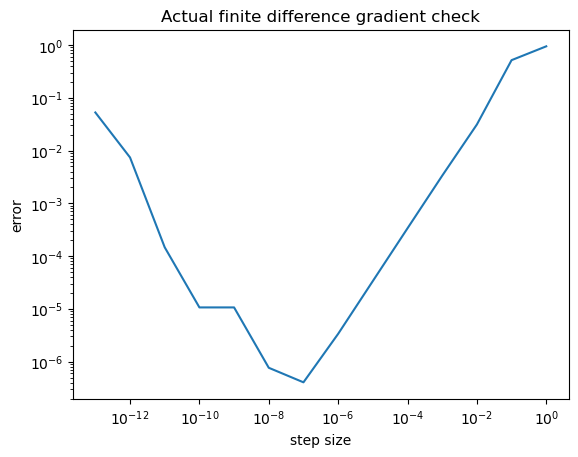

In [31]:
"""
---> Finite difference gradient check and log-log plot of finite difference error vs. step size

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 3(b)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

# class to perform finite difference gradient check 
class FiniteDifferenceGradientCheck:
    """ 
    Class to perform finite difference gradient check.
    Args:
        objective_function (function): The objective function.
        compute_gradient (function): The gradient of the objective function.
    """
    def __init__(self, objective_function, compute_gradient):
        self.objective_function = objective_function
        self.compute_gradient = compute_gradient

    def check_gradient(self, u, alpha, L0, p, step_sizes):
        """ 
        Check the gradient of the objective function.
        Args:
            u (np.array): The value of the function at the interior nodes of the mesh.
            alpha (float): The penalty parameter.
            L0 (float): The target length.
            p (np.array): The direction in which to check the gradient.
            step_sizes (list): The step sizes to use in the finite difference formula.
        Return:
            list: The gradient errors.
        """
        grad_errs = list()
        for s in step_sizes:
            J1 = self.objective_function(u, alpha, L0)
            u2 = u + s*p
            J2 = self.objective_function(u2, alpha, L0)
            dJ_du_p_diff = (J2 - J1) / s
            g = self.compute_gradient(u, alpha, L0)
            dJ_du_p = np.dot(g, p)
            grad_err = np.abs( (dJ_du_p - dJ_du_p_diff) / dJ_du_p_diff )
            print('step size=', s, ', gradient finite difference error=', grad_err)
            grad_errs.append(grad_err)
        return grad_errs

    def plot(self, step_sizes, grad_errs):
        """ 
        log-log plot of finite difference error vs. step size.
        Args:
            step_sizes (list): The step sizes to use in the finite difference formula.
            grad_errs (list): The gradient errors.
        Return:
            None
        """
        plt.loglog(step_sizes, grad_errs)
        plt.title('Actual finite difference gradient check')
        plt.xlabel('step size')
        plt.ylabel('error')
        plt.show()

# Define the values of N, alpha, L0, and u
N = 53
alpha = 8.95
L0 = 2.13
u1 = np.random.randn(N)
p = np.random.randn(N)
step_sizes = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
# Create an instance of the FiniteDifferenceGradientCheck class 
fdgc = FiniteDifferenceGradientCheck(objective_function, compute_gradient)
# Check the gradient of the objective function
grad_errs = fdgc.check_gradient(u1, alpha, L0, p, step_sizes)
# Plot the gradient errors
fdgc.plot(step_sizes, grad_errs)


#### **(c) Hessian-vector product via automatic differentiation:**

The Hessian is the derivative of the gradient, so the matrix-vector multiplication $H(u)p$ of the Hessian at $u$, $H(u)$, with a vector, $p$ is given by
$$H(u)p = \frac{d}{du} \left(\frac{d J}{du}(u) p\right) = \frac{d}{dp} \left(g(u)^T p\right).$$
In other words, $H(u) p$ is the gradient of the scalar-valued function
$$q(u) := g(u)^T p,$$
and this gradient may be calculated by automatic differentiation.

### To Do:
Use autodiff's grad function to create a function named "compute\_hessian\_vector\_product" that computes the Hessian-vector product $H(u)p$.

In [34]:
""" 
    Example hessian vector product 
"""

def f(x, a, b):
    return np.cos(a * x[0]) + np.sin(b * x[1])

compute_grad_f = grad(f, 0)

def q(x, p, a, b):
    g = compute_grad_f(x, a, b)
    return np.dot(g, p)

hessian_vector_product_f = grad(q, 0)

a = 1.4
b = 4.1
x = np.random.randn(2)
p = np.random.randn(2)

Hp_autodiff = hessian_vector_product_f(x, p, a, b)

H_analytic = np.array([[-a*a*np.cos(a * x[0]),                     0],
                       [0,                     -b*b*np.sin(b * x[1])]])

Hp_analytic = np.dot(H_analytic, p)

hess_prod_err = np.linalg.norm(Hp_analytic - Hp_autodiff) / np.linalg.norm(Hp_analytic)
print('example hessian vector product error=', hess_prod_err)

example hessian vector product error= 7.819775987508553e-17


In [35]:
"""
---> Function to compute Hessian vector product

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 3(c)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

class HessianVectorProduct:
    """ 
    Class to compute the Hessian vector product.
    Args:
        compute_gradient (function): The gradient of the objective function.
    """
    def __init__(self, compute_gradient):
        self.compute_gradient = compute_gradient
    
    def compute_q(self, u, p, alpha, L0):
        """ 
        Compute the function q.
        Args:
            u (np.array): The value of the function at the interior nodes of the mesh.
            p (np.array): The direction in which to compute the Hessian vector product.
            alpha (float): The penalty parameter.
            L0 (float): The target length.
        Return:
            float: The value of the function q.
        """
        g = self.compute_gradient(u, alpha, L0)
        return np.dot(g, p)
    
    def compute_hessian_vector_product(self, u, alpha, L0, p):
        """ 
        Compute the Hessian vector product.
        Args:
            u (np.array): The value of the function at the interior nodes of the mesh.
            alpha (float): The penalty parameter.
            L0 (float): The target length.
            p (np.array): The direction in which to compute the Hessian vector product.
        Return:
            np.array: The Hessian vector product.
        """
        hessian_vector_product = grad(self.compute_q, 0)
        return hessian_vector_product(u, p, alpha, L0)



#### Finite difference check for Hessian-vector product:

**The error should be roughly the same order of magnitude as the step size.**

In [37]:
"""
---> Testing the function HessianVectorProduct

"""

# Question 3(c)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

# Create an instance of the HessianVectorProduct class
hvp = HessianVectorProduct(compute_gradient)
# Using the instance, compute the Hessian vector product 
# for the given values of u, alpha, L0, and p 
# hp = hvp.compute_hessian_vector_product(u, alpha, L0, p)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

# define the values of N, alpha, L0, and u
N = 53
alpha = 8.95
L0 = 2.13
u1 = np.random.randn(N)
G1 = compute_gradient(u1, alpha, L0)

# define the values of p and s
p = np.random.randn(N)
s = 1e-7
# compute the gradient
u2 = u1 + s * p
G2 = compute_gradient(u2, alpha, L0)

# compute the finite difference formula 
Hp_diff = (G2 - G1) / s

# compute the Hessian vector product using the HessianVectorProduct class
Hp = hvp.compute_hessian_vector_product(u1, alpha, L0, p)

# compute the error 
hessian_vector_product_error = np.linalg.norm(Hp - Hp_diff) / np.linalg.norm(Hp_diff)

print('s=', s, ', hessian vector product finite difference error=', hessian_vector_product_error)



s= 1e-07 , hessian vector product finite difference error= 7.107879771474561e-06


#### **(d) Hessian-vector product finite difference check plot:**

#### To do:
Construct a log-log plot of the Hessian finite difference error for a wide variety of step sizes.

step size= 1.0 , Hessian vector product finite difference error= 5.183829864790854
step size= 0.1 , Hessian vector product finite difference error= 1.768004241850671
step size= 0.01 , Hessian vector product finite difference error= 0.4656802755902849
step size= 0.001 , Hessian vector product finite difference error= 0.07318718844478811
step size= 0.0001 , Hessian vector product finite difference error= 0.007451529982809293
step size= 1e-05 , Hessian vector product finite difference error= 0.0007462803603887611
step size= 1e-06 , Hessian vector product finite difference error= 7.463913923920015e-05
step size= 1e-07 , Hessian vector product finite difference error= 7.463920852888096e-06
step size= 1e-08 , Hessian vector product finite difference error= 7.498596930247765e-07
step size= 1e-09 , Hessian vector product finite difference error= 1.4865640409412213e-07
step size= 1e-10 , Hessian vector product finite difference error= 1.0363778841615446e-06
step size= 1e-11 , Hessian vector pro

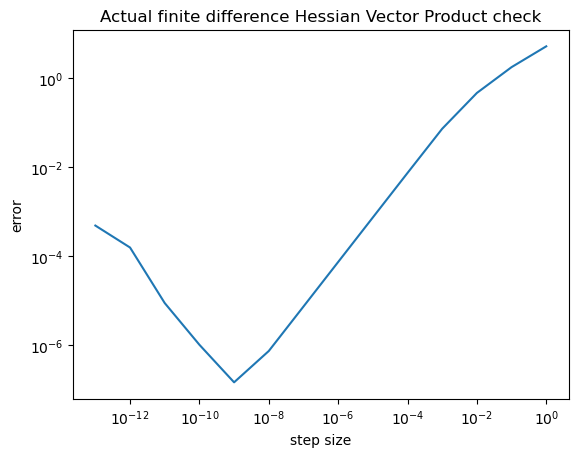

In [38]:
"""
---> log-log plot of Hessian finite difference error vs. step size

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1th March 2024
"""

# Question 3(d)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

class FiniteDifferenceHessianVectorProductCheck:
    """ 
    Class to perform finite difference Hessian vector product check and log-log plot.
    Args:
        compute_hessian_vector_product (function): The Hessian vector product.
    """
    def __init__(self, compute_hessian_vector_product):
        self.compute_hessian_vector_product = compute_hessian_vector_product
    
    def check_hessian_vector_product(self, u, p, alpha, L0, step_sizes):
        """ 
        Check the Hessian vector product.
        Args:
            u (np.array): The value of the function at the interior nodes of the mesh.
            p (np.array): The direction in which to compute the Hessian vector product.
            alpha (float): The penalty parameter.
            L0 (float): The target length.
            step_sizes (list): The step sizes to use in the finite difference formula.
        Return:
            list: The Hessian vector product errors.
        """
        hvp_errs = list()
        for s in step_sizes:
            G1 = compute_gradient(u, alpha, L0)
            u2 = u + s*p
            G2 = compute_gradient(u2, alpha, L0)
            Hp_diff = (G2 - G1) / s
            Hp = self.compute_hessian_vector_product(u, alpha, L0, p)
            hessian_vector_product_error = np.linalg.norm(Hp - Hp_diff) / np.linalg.norm(Hp_diff)
            print('step size=', s, ', Hessian vector product finite difference error=', hessian_vector_product_error)
            hvp_errs.append(hessian_vector_product_error)
        return hvp_errs

    def plot(self, step_sizes, hvp_errs):
        """ 
        log-log plot of Hessian finite difference error vs. step size.
        Args:
            step_sizes (list): The step sizes to use in the finite difference formula.
            hvp_errs (list): The Hessian vector product errors.
        Return:
            None
        """
        plt.loglog(step_sizes, hvp_errs)
        plt.title('Actual finite difference Hessian Vector Product check')
        plt.xlabel('step size')
        plt.ylabel('error')
        plt.show()

# define the values of N, alpha, L0, and u
N = 53
alpha = 8.95
L0 = 2.13
u1 = np.random.randn(N)
p = np.random.randn(N)
step_sizes = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]

# Create an instance of the FiniteDifferenceHessianVectorProductCheck class
fdhvp = FiniteDifferenceHessianVectorProductCheck(hvp.compute_hessian_vector_product)
# Check the Hessian vector product
hvp_errs = fdhvp.check_hessian_vector_product(u1, p, alpha, L0, step_sizes)
# Plot the Hessian vector product errors
fdhvp.plot(step_sizes, hvp_errs)


#### Comparison with dense Hessian

The dense $N \times N$ Hessian matrix is the Jacobian of the gradient, which can also be computed via automatic differentiation. This is not recommended for large problems.

Here we show how to compute the dense Hessian using the jacobian function in autograd.

In [39]:
from autograd import jacobian

# compute the jacobian
compute_hessian = jacobian(compute_gradient, 0)

#### Test dense Hessian

**Error should be order machine epsilon (less than $10^{-14}$)**

In [42]:
"""
---> Testing the dense Hessian

Given
"""

# Question 3(d)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

N = 15
alpha = 8.95
L0 = 2.13
u1 = np.random.randn(N)

H = compute_hessian(u1, alpha, L0)

p = np.random.randn(N)
Hp_dense = np.dot(H, p)
# compute the Hessian vector product using the HessianVectorProduct class 
hvp = HessianVectorProduct(compute_gradient)

Hp = hvp.compute_hessian_vector_product(u1, alpha, L0, p)

dense_hessian_error = np.linalg.norm(Hp_dense - Hp) / np.linalg.norm(Hp)
print('dense_hessian_error=', dense_hessian_error)


dense_hessian_error= 8.99111523338581e-16


#### <div align="center"> Problem-4: Comparison of optimization methods </div> 

In this problem, we will minimize $J$ using the method of steepest descent, BFGS, and the Newton-Conjugate-Gradient method. We will also plot convergence curves, and estimate the rate of convergence for these methods.

We will do this for steepest descent and Newton-CG.

### Problem parameters

For this problem, please use $N=32$, $L_0 = 3.0$, and $\alpha=1e2$.

In [46]:
""" 
Defining the global variables for the optimization problem

Question 4
"""

N = 32
L0 = 3.0
alpha = 1e2

# Useful versions of the objective, gradient, 
# and hessian-vector product functions
J_func = lambda u: objective_function(u, alpha, L0)
g_func = lambda u: compute_gradient(u, alpha, L0)
# initialize the HessianVectorProduct class
hvp = HessianVectorProduct(compute_gradient)
Hp_func = lambda u, p: hvp.compute_hessian_vector_product(u, alpha, L0, p)

#### Initial guess

A reasonable initial guess is the parabola
$$u_0(x) = -C~ x(1-x)$$
with constant 
$$C = 2 \left(L_0 - 1\right).$$
The constant $C$ is chosen to make the arc length of $u$ close to $L_0$. The formula for $C$ can be derived by approximating the arc length of the parabola with the length of box function that has the same minimum value.

In [47]:
""" 
    defining the u
"""
xx_including_endpoints = np.linspace(0.0, 1.0, N+2)

C = -2.0 * (L0 - 1.0)
u0_including_endpoints = C * xx_including_endpoints * (1.0-xx_including_endpoints)
u0 = u0_including_endpoints[1:-1]


#### Minimizing with BFGS: 


In [61]:
from scipy import optimize

u = u0.copy()
JJ_bfgs = list()
gradnorms_bfgs = list()
def callback(uk):
    JJ_bfgs.append(J_func(uk))
    gradnorms_bfgs.append(np.linalg.norm(g_func(uk)))
    
sol = optimize.minimize(J_func, u0, method='BFGS', jac=g_func, callback=callback, tol=1e-6)
print(sol)
    
u = sol.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2.1828846090862317
        x: [-2.380e-01 -4.379e-01 ... -4.379e-01 -2.380e-01]
      nit: 96
      jac: [ 6.335e-08  2.527e-07 ... -9.903e-08 -6.101e-08]
 hess_inv: [[ 5.930e+00  4.407e+00 ... -1.927e-01  1.317e-01]
            [ 4.407e+00  8.032e+00 ... -1.285e-01 -1.444e-01]
            ...
            [-1.927e-01 -1.285e-01 ...  7.728e+00  4.423e+00]
            [ 1.317e-01 -1.444e-01 ...  4.423e+00  4.381e+00]]
     nfev: 110
     njev: 110


#### BFGS: check that solution gradient is small and plot the solution

||g(u)|| / ||g(u_0)||= 2.2866785574640125e-08


Text(0, 0.5, 'u(x)')

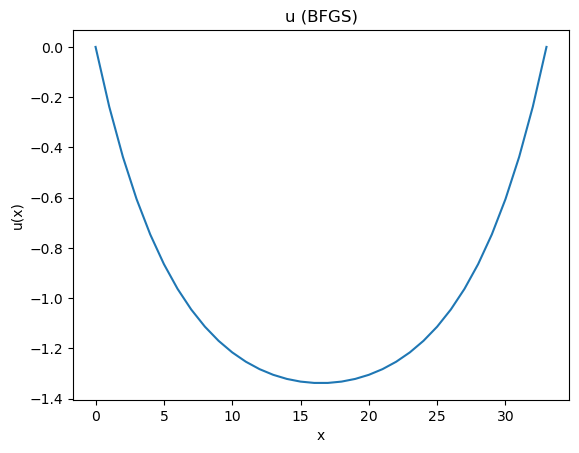

In [62]:
norm_g0 = np.linalg.norm(g_func(u0))
norm_g = np.linalg.norm(g_func(u))
print('||g(u)|| / ||g(u_0)||=', norm_g / norm_g0) # should be less than 1e-6

u_including_endpoints = np.concatenate([[0], u, [0]])

plt.figure()
plt.plot(u_including_endpoints)
plt.title('u (BFGS)')
plt.xlabel('x')
plt.ylabel('u(x)')

#### Plot convergence of $J - J_*$ for BFGS

We use the last value of $J$ as a proxy for the solution $J_*$. 

Text(0.5, 0, '$k$')

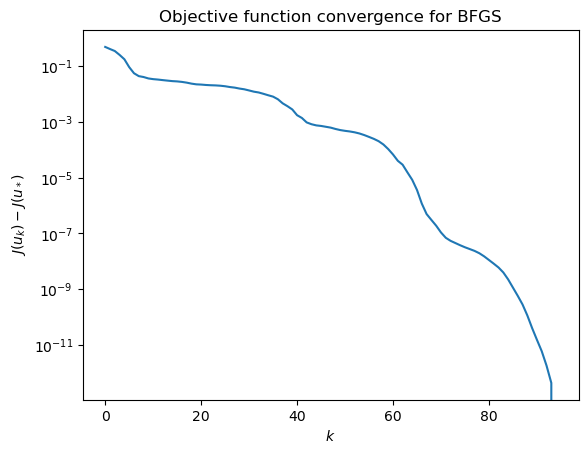

In [63]:
plt.semilogy(JJ_bfgs[1:] - JJ_bfgs[-1])
plt.title('Objective function convergence for BFGS')
plt.ylabel('$J(u_k) - J(u_*)$')
plt.xlabel('$k$')

#### BFGS: estimate convergence rate

Asymptotically, the error should decrease as
$$||g(u_{k+1})|| \le c ||g(u_{k})||^q$$
for some constant $c$ and convergence rate $q$, where $u_*$ is the solution to the optimization problem. 

We can estimate the convergence rate, $q$, by plotting $||g(u_{k+1})||$ vs. $||g(u_{k})||$ on a log-log plot and finding the slope.

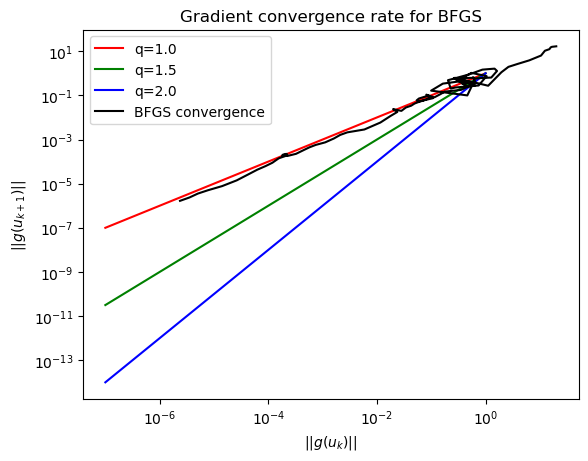

In [64]:
xx = np.logspace(-7, 0, 13)
yy10 = np.power(xx, 1.0)
yy15 = np.power(xx, 1.5)
yy20 = np.power(xx, 2.0)
plt.loglog(xx, yy10,'r')
plt.loglog(xx, yy15,'g')
plt.loglog(xx, yy20,'b')

plt.loglog(gradnorms_bfgs[:-1], gradnorms_bfgs[1:],'k')
plt.title('Gradient convergence rate for BFGS')
plt.ylabel('$||g(u_{k+1})||$')
plt.xlabel('$||g(u_k)||$')
plt.legend(['q=1.0', 'q=1.5', 'q=2.0', 'BFGS convergence'])

#### **(a) Steepest descent:**

The method of steepest descent minimizes the function $J(u)$ via the iteration
$$u_{k+1} = u_k - \beta
_kg(u_k)$$
where $u_k$ is the $k\text{th}$ iterate, $g(u_k)$ is the gradient at the $k\text{th}$ iterate, and $\beta_k$ is a step size parameter.

#### To Do:

Minimize $J$ using the method of steepest descent. Write steepest descent code for this (do not use existing steepest descent libraries).

Continue iterating until $||g_k|| < 10^{-6} ||g_0||$ or smaller. This should require several thousand iterations.

Save the function values $J(u_k)$ for all iterations so we can plot the convergence.


**Hint: step size**

The trick here is choosing $\beta_k$. If $\beta_k$ is too large, the method may become unstable and diverge. If $\beta_k$ is too small, the method will converge slowly. 

A popular option is to choose a step length satisfying the Wolfe conditions:

https://en.wikipedia.org/wiki/Wolfe_conditions

You may use the function scipy.optimize.line_search to find a step length satisfying these conditions:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.line_search.html#scipy.optimize.line_search


In [73]:
"""
---> Function to perform steepest descent optimization

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 4(a)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad, jacobian
from scipy import optimize
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

class SteepestDescent:
    """ 
    Class to perform steepest descent optimization.
    Args:
        objective_function (function): The objective function.
        compute_gradient (function): The gradient of the objective function.
    """
    def __init__(self, objective_function, compute_gradient):
        self.objective_function = objective_function
        self.compute_gradient = compute_gradient
    
    def optimize(self, u0, tol=1e-6):
        """ 
        Perform steepest descent optimization.
        Args:
            u0 (np.array): The initial guess.
            tol (float): The tolerance for the gradient norm.
        Return:
            np.array: The solution.
            np.array: The objective function values.
            np.array: The gradient norms.
        """
        u = u0.copy() # update u each iteration
        J0 = self.objective_function(u)
        g0 = self.compute_gradient(u)
        norm_g0 = np.linalg.norm(g0)
        JJ = list()
        JJ.append(J0) # Keep appending the value of J to this list each iteration
        gradnorms = list()
        gradnorms.append(norm_g0) # keep appending the value of ||g|| each iteration
        # instead of printing in each iteration, show a progressbar and keep updating the values of J and ||g|| against the iteration number 
        self.beta_k = []
        self.norm = []
        
        # progress bar widget
        progress_output = widgets.Output()
        # Display the widget where the progress will be updated
        display(progress_output)
        iteration = 0
        while np.linalg.norm(self.compute_gradient(u))/np.linalg.norm(g0) > tol:
            
            # compute the search direction
            d = -self.compute_gradient(u)
            # perform a line search
            res = optimize.line_search(self.objective_function, self.compute_gradient, u, d)
            # update u
            u = u + res[0]*d
            # keep track of the objective function and gradient norms
            JJ.append(self.objective_function(u))
            gradnorms.append(np.linalg.norm(self.compute_gradient(u)))
            
            self.beta_k.append(res[0])
            norm_gu_g0 = np.linalg.norm(self.compute_gradient(u))/np.linalg.norm(g0)
            self.norm.append(norm_gu_g0)
            
            # Update the progress in the designated output widget
            with progress_output:
                clear_output(wait=True) # Clear the previous progress info
                display(HTML(f'Iteration: {iteration}, beta_k: {res[0]:.4f}, ||g(u)|| / ||g(u_0)||: {norm_gu_g0:.4f}'))
            
            iteration += 1
            
        # Now the solution should be in the variable u
        # and JJ should be a list, with JJ[k] = J(u_k)
        return np.array(JJ), np.array(gradnorms), u
    
    
# Create an instance of the SteepestDescent class
sd = SteepestDescent(J_func, g_func)
# Perform steepest descent optimization
JJ, gradnorms, u = sd.optimize(u0)
# now access the beta_k and norm to check any iteration 
print('Length of beta_k=', len(sd.beta_k))



Output()

Length of beta_k= 3363


#### Test:

**Testing the steepest descent function, norm_g should be less than $10^{-6}$.**
 

||g(u)|| / ||g(u_0)||= 9.977298924009776e-07


Text(0, 0.5, 'u(x)')

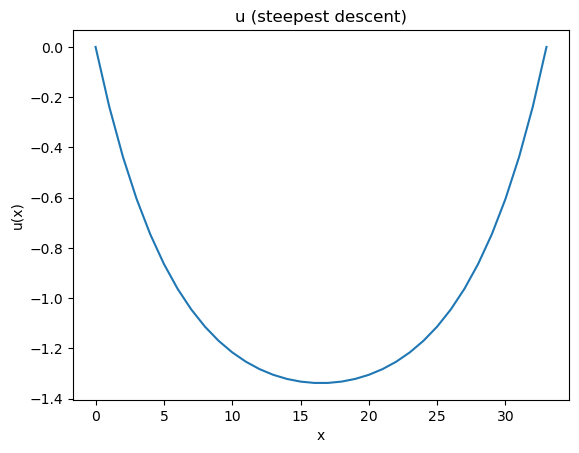

In [75]:
"""
---> Testing the function SteepestDescent
"""

# Question 4(a)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

norm_g = np.linalg.norm(g_func(u))
print('||g(u)|| / ||g(u_0)||=', norm_g / norm_g0) # should be less than 1e-6
# if error is above 1e-6, Print the error message 
if norm_g / norm_g0 > 1e-6:
    print('Error is too high!')

u_including_endpoints = np.concatenate([[0], u, [0]])

plt.figure()
plt.plot(u_including_endpoints)
plt.title('u (steepest descent)')
plt.xlabel('x')
plt.ylabel('u(x)')

#### Plot convergence of $J - J_*$ for steepest descent

**Use the last value of $J$ as a proxy for the solution $J_*$.**

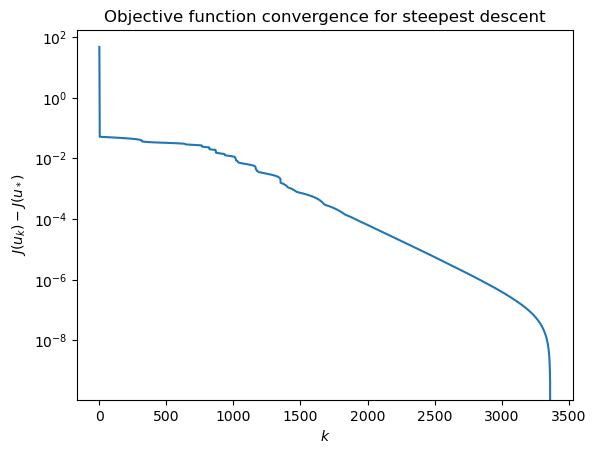

In [77]:
"""
---> Function for semilogy plot Jk - J* vs. k for steepest descent

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 4(a)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad, jacobian
from scipy import optimize
# suppress warnings 
import warnings
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
def semilogy_plot(JJ):
    """ 
    Plot Jk - J* vs. k for steepest descent.
    Args:
        JJ (np.array): The objective function values.
    Return:
        None
    """
    plt.semilogy(JJ - JJ[-1])
    plt.title('Objective function convergence for steepest descent')
    plt.ylabel('$J(u_k) - J(u_*)$')
    plt.xlabel('$k$')
    plt.show()
    

# Plot the objective function convergence
semilogy_plot(JJ)


#### **(b) Steepest descent convergence rate:**

Asymptotically, the error should decrease as
$$||g(u_{k+1})|| \le c ||g(u_{k})||^q$$
for some constant $c$ and convergence rate $q$, where $u_*$ is the solution to the optimization problem. 

### To Do:

Estimate the convergence rate, $q$, by plotting $||g(u_{k+1})||$ vs. $||g(u_{k})||$ on a log-log plot and finding the slope. 

**Note:** the curve may be fuzzy because of oscillatory overshooting in gradient descent.



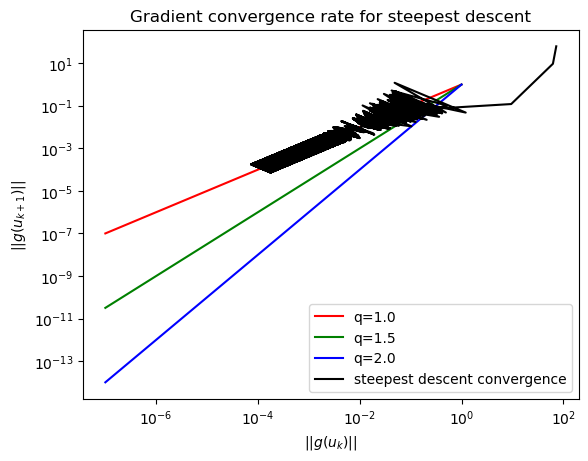

In [80]:
"""
---> Function for log-log plot for the gradient convergence rate for steepest descent and estimating the convergence rate

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 4(b)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad, jacobian
from scipy import optimize
# suppress warnings 
import warnings
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

# Make a loglog plot of ||g_(k+1)|| vs. ||g_k|| for steepest descent

def gradient_convergence_rate(gradnorms):
    """ 
    Plot the gradient convergence rate for steepest descent and estimate the convergence rate.
    Args:
        gradnorms (np.array): The gradient norms.
    Return:
        None
    """
    xx = np.logspace(-7, 0, 13)
    yy10 = np.power(xx, 1.0)
    yy15 = np.power(xx, 1.5)
    yy20 = np.power(xx, 2.0)
    plt.loglog(xx, yy10,'r')
    plt.loglog(xx, yy15,'g')
    plt.loglog(xx, yy20,'b')
    plt.loglog(gradnorms[:-1], gradnorms[1:],'k')
    plt.title('Gradient convergence rate for steepest descent')
    plt.ylabel('$||g(u_{k+1})||$')
    plt.xlabel('$||g(u_k)||$')
    plt.legend(['q=1.0', 'q=1.5', 'q=2.0', 'steepest descent convergence'])
    plt.show()
    

# Plot the gradient convergence rate
gradient_convergence_rate(gradnorms)


#### convergence rate for steepest descent

The observed convergence rate is the same as the theoretical value $q = 1$.

#### **(c) Newton-CG:**

### To Do:

Minimize $J$ uising the Newton-CG method implemented in scipy.optimize.minimize:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

https://docs.scipy.org/doc/scipy/reference/optimize.minimize-newtoncg.html

 - Use a tolerance of $10^{-6}$

 - Save the intermediate values of $J(u_k)$ so that we can study convergence.


**Hint: To save intermediate values of $J(u_k)$, use a "callback" function.**

In [85]:
"""
--->  Funciton to do Newton_CG optimization

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 4(c)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad, jacobian
from scipy import optimize
# suppress warnings 
import warnings
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
# use optimize.minimize with the Newton-CG method
u = u0.copy()
JJ_ncg = list()
gradnorms_ncg = list()
def callback(uk):
    JJ_ncg.append(J_func(uk))
    gradnorms_ncg.append(np.linalg.norm(g_func(uk)))

sol = optimize.minimize(J_func, u0, method='Newton-CG', jac=g_func, hessp=Hp_func, callback=callback, tol=1e-6)
print(sol)    

u = sol.x



 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -2.1828846090870857
       x: [-2.380e-01 -4.379e-01 ... -4.379e-01 -2.380e-01]
     nit: 28
     jac: [-4.774e-08  1.324e-08 ...  1.025e-08 -5.204e-08]
    nfev: 37
    njev: 37
    nhev: 299


#### Test

**Testing the Newton-CG function, norm_g should be less than $10^{-6}$.**

||g(u)|| / ||g(u_0)||= 2.8868956976676424e-10


Text(0, 0.5, 'u(x)')

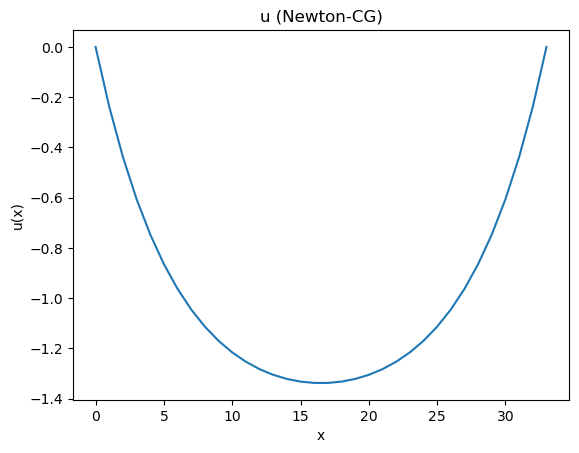

In [87]:
"""
--->  Testing the function Newton_CG 
"""

# Question 4(c)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#
norm_g = np.linalg.norm(g_func(u))
print('||g(u)|| / ||g(u_0)||=', norm_g / norm_g0) # should be less than 1e-6

# if error is above 1e-6, Print the error message 
if norm_g / norm_g0 > 1e-6:
    print('Error is too high!')

u_including_endpoints = np.concatenate([[0], u, [0]])

plt.figure()
plt.plot(u_including_endpoints)
plt.title('u (Newton-CG)')
plt.xlabel('x')
plt.ylabel('u(x)')

#### Plot convergence of $J - J_*$ for Newton-CG

**Use the last value of $J$ as a proxy for the solution $J_*$.**

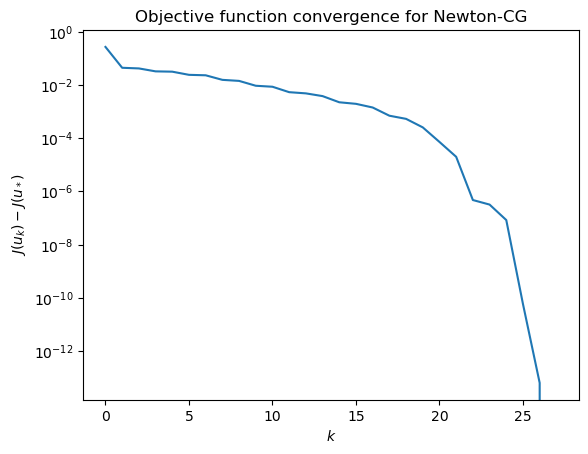

In [89]:
"""
---> Function to perform semilogy plot Jk - J* vs. k for Newton-CG

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 4(c)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

def semilogy_plot_ncg(JJ_ncg):
    """ 
    Plot Jk - J* vs. k for Newton-CG.
    Args:
        JJ_ncg (np.array): The objective function values.
    Return:
        None
    """
    plt.semilogy(JJ_ncg - JJ_ncg[-1])
    plt.title('Objective function convergence for Newton-CG')
    plt.ylabel('$J(u_k) - J(u_*)$')
    plt.xlabel('$k$')
    plt.show()

# Plot the objective function convergence
semilogy_plot_ncg(JJ_ncg)


#### **(d) Newton-CG convergence:** 

Asymptotically, the error should decrease as
$$||g(u_{k+1})|| \le c ||g(u_{k})||^q$$
for some constant $c$ and convergence rate $q$, where $u_*$ is the solution to the optimization problem. 

#### To Do:

Estimate the convergence rate, $q$, by plotting $||g(u_{k+1})||$ vs. $||g(u_{k})||$ on a log-log plot and finding the slope. 

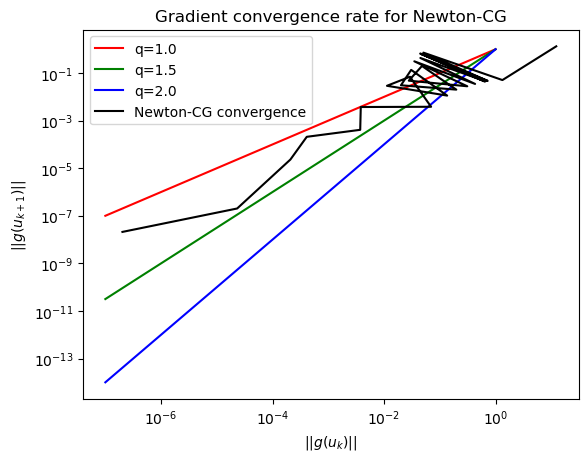

In [92]:
"""
---> Function for log-log plot for the gradient convergence rate for Newton-CG and estimating the convergence rate

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 4(d)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

# Make a loglog plot of ||g_(k+1)|| vs. ||g_k|| for steepest descent

def gradient_convergence_rate_ncg(gradnorms_ncg):
    """ 
    Plot the gradient convergence rate for Newton-CG and estimate the convergence rate.
    Args:
        gradnorms_ncg (np.array): The gradient norms.
    Return:
        None
    """
    xx = np.logspace(-7, 0, 13)
    yy10 = np.power(xx, 1.0)
    yy15 = np.power(xx, 1.5)
    yy20 = np.power(xx, 2.0)
    plt.loglog(xx, yy10,'r')
    plt.loglog(xx, yy15,'g')
    plt.loglog(xx, yy20,'b')
    plt.loglog(gradnorms_ncg[:-1], gradnorms_ncg[1:],'k')
    plt.title('Gradient convergence rate for Newton-CG')
    plt.ylabel('$||g(u_{k+1})||$')
    plt.xlabel('$||g(u_k)||$')
    plt.legend(['q=1.0', 'q=1.5', 'q=2.0', 'Newton-CG convergence'])
    plt.show()
    
# Plot the gradient convergence rate
gradient_convergence_rate_ncg(gradnorms_ncg)

    
    

#### convergence rate for Newton-CG
The observed convergence rate $q$ lies in between $1$ and $1.5$. Therefore the forcing term $\beta_k$ in scipy's implementation of Newton-CG is $\min(0.5,||\textbf{g}_k||^{0.5})$ due to superlinear convergence. Note that Newton-CG has a superlinear convergence whereas rest two have a linear convergence.Naturallyy, Newton-CG is a more efficient choice. Also, the order of convergence profile for Newton-CG is unfaithful. 

#### <div align="center"> Problem-5: Mesh Independence and Mesh Continution </div> 

Mesh independence (sometimes called dimension independence) is a property often enjoyed by Newton methods for infinite dimensional problems, but not by other methods. This concept refers to the relatively constant number of iterations taken by Newton’s method as the mesh is refined.


#### **(a) Mesh Independence for steepest decent:** 

Confirm that steepest descent does not exhibit mesh independence by solving the optimization problem (1) for a sequences of meshes from N + 1 = 8, 16, 32, 64, 128.


### To Do:

**Find the number of steps to converge $||g(u)|| / ||g(u_0)||<10^{-6}$ for $N+1=\{8,16,32,64,128 \}$ using steepest descent.**

In [93]:
"""
---> Function for steepest convergence with given mesh size and verifying that it is mesh dependent 

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 5(a)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

C = -2.0 * (L0 - 1.0)
N_array = [7,15,31,63,127]

k_array = []
# loop over the mesh sizes
for N in N_array:
    # define the values of u0
    xx_including_endpoints = np.linspace(0.0, 1.0, N+2)
    u0_including_endpoints = C * xx_including_endpoints * (1.0-xx_including_endpoints)
    u0 = u0_including_endpoints[1:-1]
    # use the SteepestDescent class to perform steepest descent optimization 
    sd = SteepestDescent(J_func, g_func)
    # Perform steepest descent optimization
    JJ, gradnorms, u = sd.optimize(u0)
    # check the covergence rate by length of beta_k
    k = len(sd.beta_k)    
    print(N+1,k+1)
    k_array.append(k)



Output()

8 3401


Output()

16 2787


Output()

32 3820


Output()

64 8453


Output()

KeyboardInterrupt: 

from the above observation, it is obvious that convergence rate is directly correlated to number of nodes. Thus, the steepest descent is **mesh-dependent**.

#### **(b) Netwon-CG - Convergence rate vs mesh:** 

Use Newton-CG to solve (1) for a series of meshes from N + 1 = 8, 16, 32, 64, 128. How does the number of iterations change as the mesh is refined?

### To Do:

**Find the number of steps to converge $||g(u)|| / ||g(u_0)||<10^{-6}$ for $N+1=\{8,16,32,64,128 \}$ using Newton-CG.**


In [94]:
"""
---> Function for Newton-CG convergence with given mesh size; pattern of iteration with mesh refinement

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""

# Question 5(b)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

C = -2.0 * (L0 - 1.0)
N_array = [7,15,31,63,127]

k_array_ncg = []
# loop over the mesh sizes
for N in N_array:
    # define the values of u0
    xx_including_endpoints = np.linspace(0.0, 1.0, N+2)
    u0_including_endpoints = C * xx_including_endpoints * (1.0-xx_including_endpoints)
    u0 = u0_including_endpoints[1:-1]
    # use optimize.minimize with the Newton-CG method
    u = u0.copy()
    JJ_ncg = list()
    gradnorms_ncg = list()
    def callback(uk):
        JJ_ncg.append(J_func(uk))
        gradnorms_ncg.append(np.linalg.norm(g_func(uk)))
    sol = optimize.minimize(J_func, u0, method='Newton-CG', jac=g_func, hessp=Hp_func, callback=callback, tol=1e-6)
    u = sol.x
    # check the covergence rate by length of beta_k
    k = len(JJ_ncg)    
    print(N+1,k+1)
    k_array_ncg.append(k)


8 23
16 28
32 29
64 32
128 35


From the above observation, we can not conclude that Newton-CG is mesh-independent. The number of iterations increases with the number of nodes, but the rate of increase is not as steep as steepest descent.

#### **(c) Netwon-CG - Mesh Continous:** 

Solve (1) for N + 1 = 8 using Newton-CG, then interpolate the solution onto the mesh for N + 1 = 16. Use the interpolated function as the initial guess for solving (1) for N + 1 = 16 using Newton-CG. Repeat this process for N + 1 = 32, 64, 128, at each step using the interpolated solution from the previous mesh as the initial guess for the current mesh. How do the numbers of Newton iterations here compare to those found in 5a?



In [ ]:
"""
---> Function for Solve (1) for N + 1 = 8 using Newton-CG, then interpolate the solution onto the mesh for N + 1 = 16. Use the interpolated function as the initial guess for solving (1) for N + 1 = 16 using Newton-CG. Repeat this process for N + 1 = 32, 64, 128, at each step using the interpolated solution from the previous mesh as the initial guess for the current mesh. How do the numbers of Newton iterations here compare to those found in 5a?

Author: Shreshth Saini (saini.2@utexas.edu)
Date: 1st March 2024
"""
# Question 5(c)
#------------------------------------------------------------------------------------------------------xx------------------------------------------------------------------------------------------------------#

C = -2.0 * (L0 - 1.0)
N_array = [7,15,31,63,127]
u0 = np.zeros(8)
# loop over the mesh sizes
for N in N_array:
    # define the values of u0
    xx_including_endpoints = np.linspace(0.0, 1.0, N+2)
    u0_including_endpoints = C * xx_including_endpoints * (1.0-xx_including_endpoints)
    u0 = u0_including_endpoints[1:-1]
    # use optimize.minimize with the Newton-CG method
    u = u0.copy()
    JJ_ncg = list()
    gradnorms_ncg = list()
    def callback(uk):
        JJ_ncg.append(J_func(uk))
        gradnorms_ncg.append(np.linalg.norm(g_func(uk)))
    sol = optimize.minimize(J_func, u0, method='Newton-CG', jac=g_func, hessp=Hp_func, callback=callback, tol=1e-6)
    u = sol.x
    u0 = u
    print(N+1,len(JJ_ncg)+1)
    


In [ ]:

# lets solve for N+1 = 8 using Newton-CG
N = 7
xx_including_endpoints = np.linspace(0.0, 1.0, N+2)
u0_including_endpoints = C * xx_including_endpoints * (1.0-xx_including_endpoints)
u0 = u0_including_endpoints[1:-1]
# use optimize.minimize with the Newton-CG method
u = u0.copy()
JJ_ncg = list()
gradnorms_ncg = list()
def callback(uk):
    JJ_ncg.append(J_func(uk))
    gradnorms_ncg.append(np.linalg.norm(g_func(uk)))
sol = optimize.minimize(J_func, u0, method='Newton-CG', jac=g_func, hessp=Hp_func, callback=callback, tol=1e-6)
u = sol.x

# lets interpolate the solution of N = 8 on the mesh for N = 16 and then treat it as the initial guess for N = 16 and then optimize using Newton-CG 
N = 15
# define the values of u0; interpolate the solution of N = 8 on the mesh for N = 16 
xx_including_endpoints = np.linspace(0.0, 1.0, N+2)
